<a href="https://colab.research.google.com/github/youmjisun/gachon_3-2/blob/main/6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##차원축소
다차원 배열에서 차원
: 배열의 축 개수

1차원 배열에서 차원
: 원소의 개수


특성이 많으면 ?
장점 : 선형 모델의 성능이 높어짐
단점

: 훈련 데이터에 쉽게 과대적합됨

: 데이터 용량이 급격히 증가하여 저장공간이 부족

: 모델 처리 속도가 떨어짐

=> 차원 축소는 데이터를 가장 잘 나타내는 일부 특성 만을 선택하여 데이터 크기를 줄이고 지도학습 모델의 성능을 향상 시킬 수 있음
줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수 있음

##주성분 분석
대표적인 차원 축소 알고리즘

데이터에 있는 분산이 큰 방향을 찾는 것

- 분산 : 데이터가 널리 퍼져있는 정도

- 분산이 큰 방향 :  데이터를 잘 표현하는 어떤 백터

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2023-10-30 01:42:01--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-10-30 01:42:01--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-10-30 01:42:01--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

In [2]:
#2차원 배열로 변형
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
# 주성분 알고리즘 사용
from sklearn.decomposition import PCA
#객체 생성
pca = PCA(n_components=50)
#훈련
pca.fit(fruits_2d)
print(pca.components_.shape)

(50, 10000)


In [9]:
#주성분을 이미지처럼 출력
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

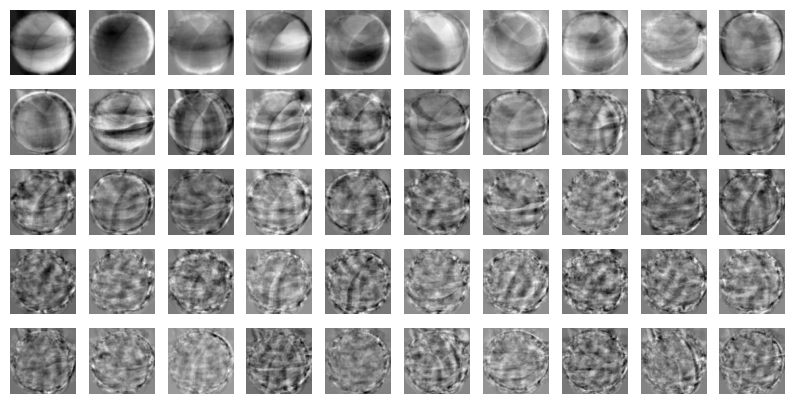

In [10]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [14]:
#찾아낸 주성분을 이용하여 원본 데이터의 특성을 50으로 줄이기
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


In [12]:
#원본 데이터 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


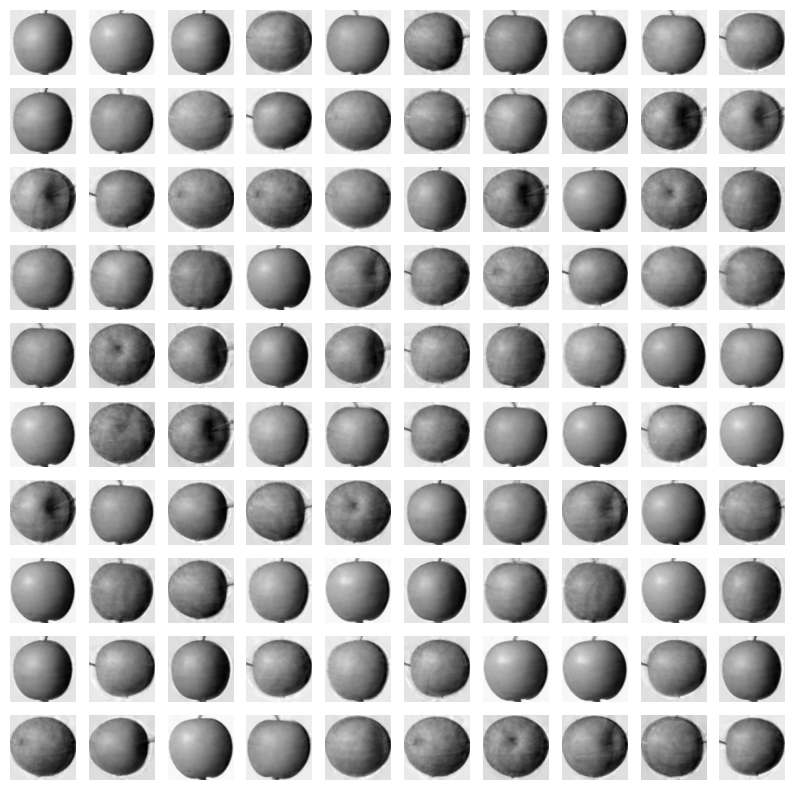

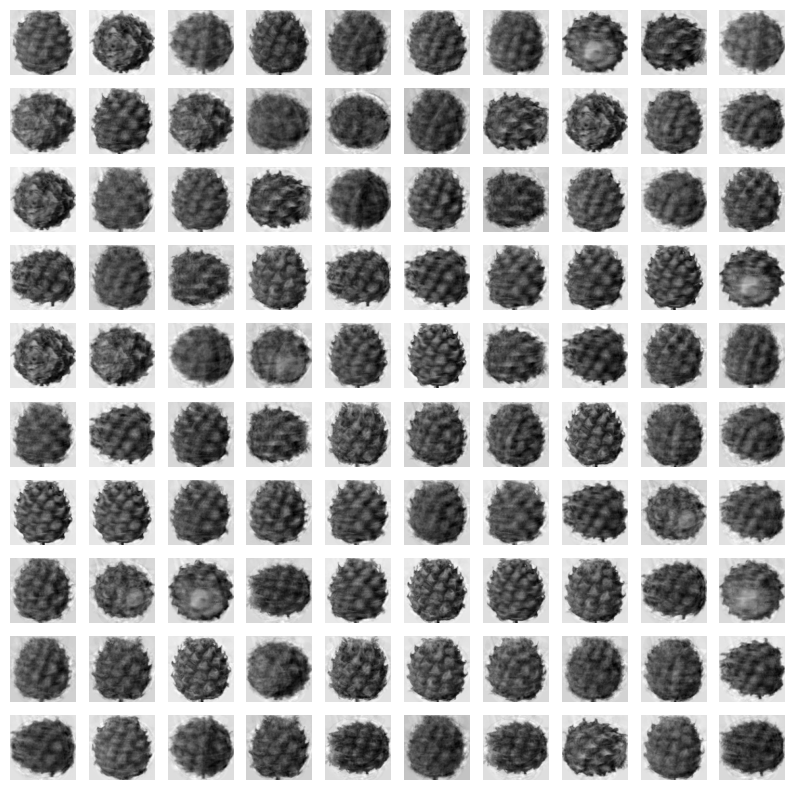

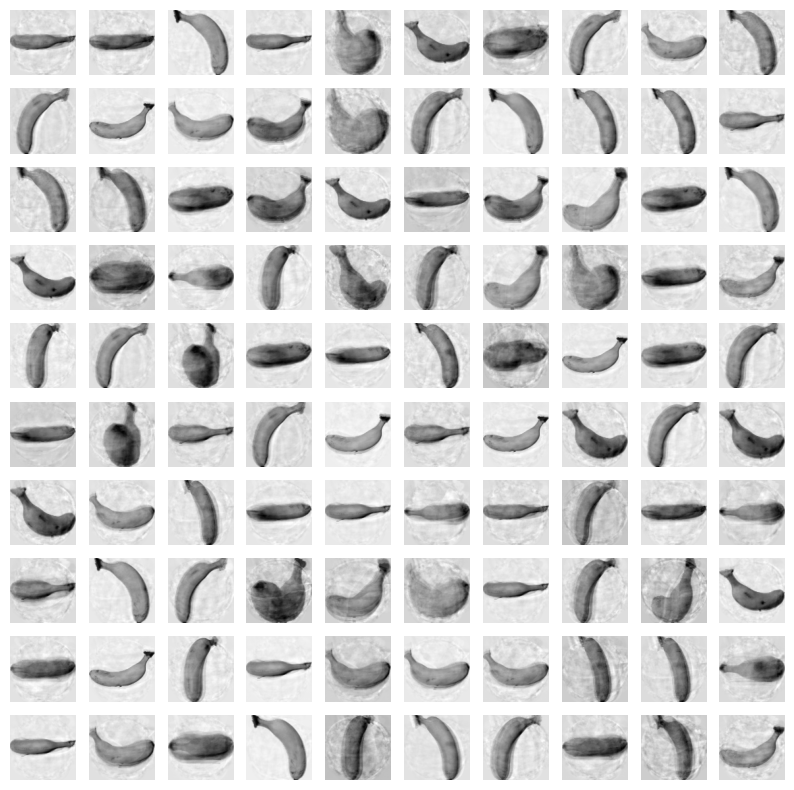

In [13]:
#그림을 그려 손실 발생 확인
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

##설명된 분산
주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값


In [15]:
print(np.sum(pca.explained_variance_ratio_))

0.9215402534290463


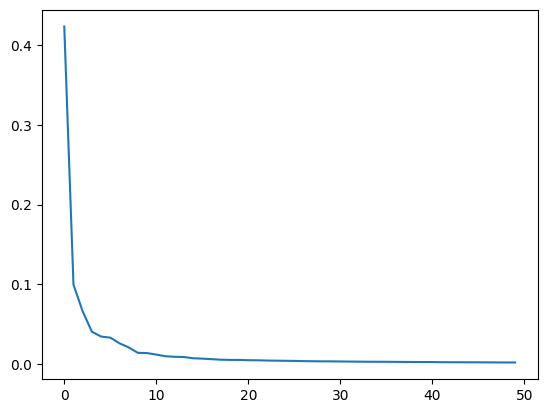

In [16]:
plt.plot(pca.explained_variance_ratio_)

과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용하고 차이를 찾아보자

In [19]:
from sklearn.linear_model import LogisticRegression
#모델 객채 생성
lr = LogisticRegression()

#배열로 만들고 타깃으로 설정
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [20]:
#원본 데이터만 fruits_2d 사용
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.9321122646331788


In [21]:
#PCA로 축환 fruits_pca 사용
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.0247037410736084


0.5
0.5229877245800599


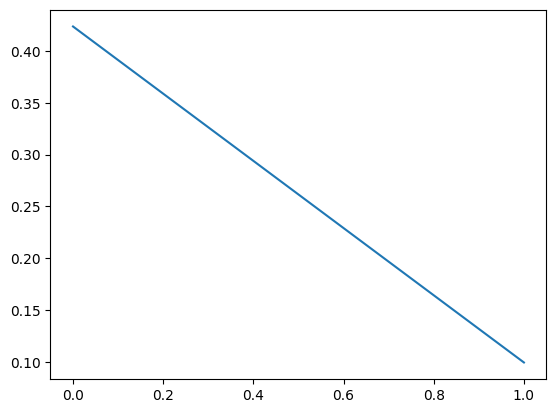

In [23]:
#주성분의 개수 대신 분산의 비율로 주성분을 찾을 수 있음
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components)
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [22]:
#원본 데이터 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [26]:
#교차 검증 수행
lr = LogisticRegression(max_iter=1000)
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.0433743953704834


In [25]:
#차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터 찾기
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


^2절에서 원본 데이터를 사용했을 때와 거의 비슷한 결과임

array[0,1,2], dtype=int32, array([112, 98, 90])

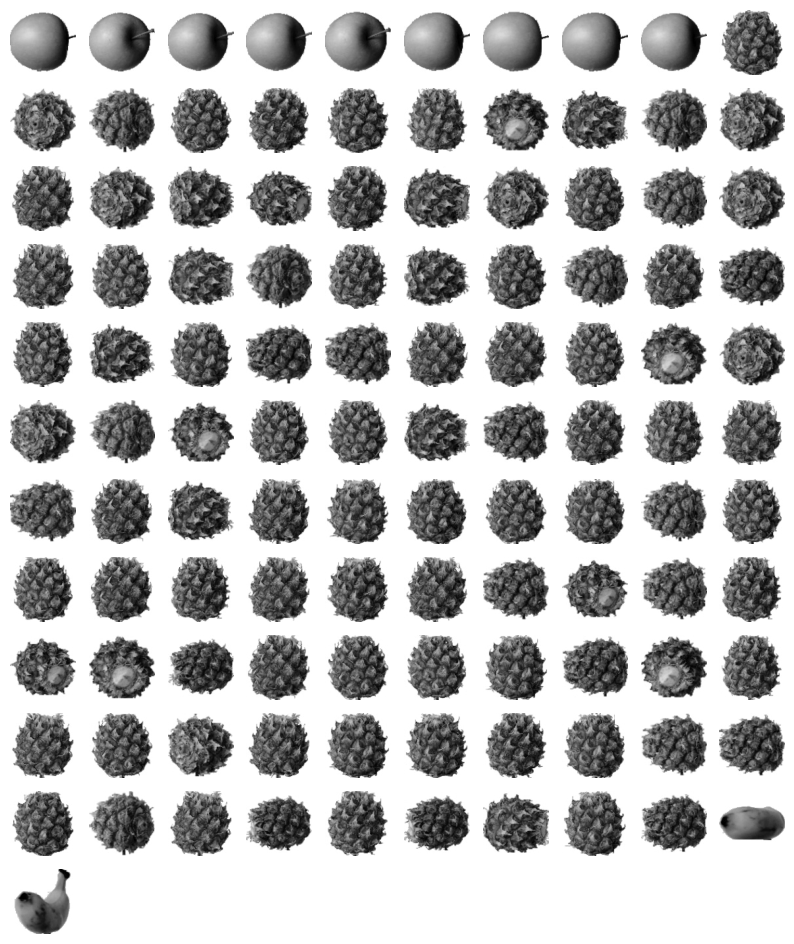

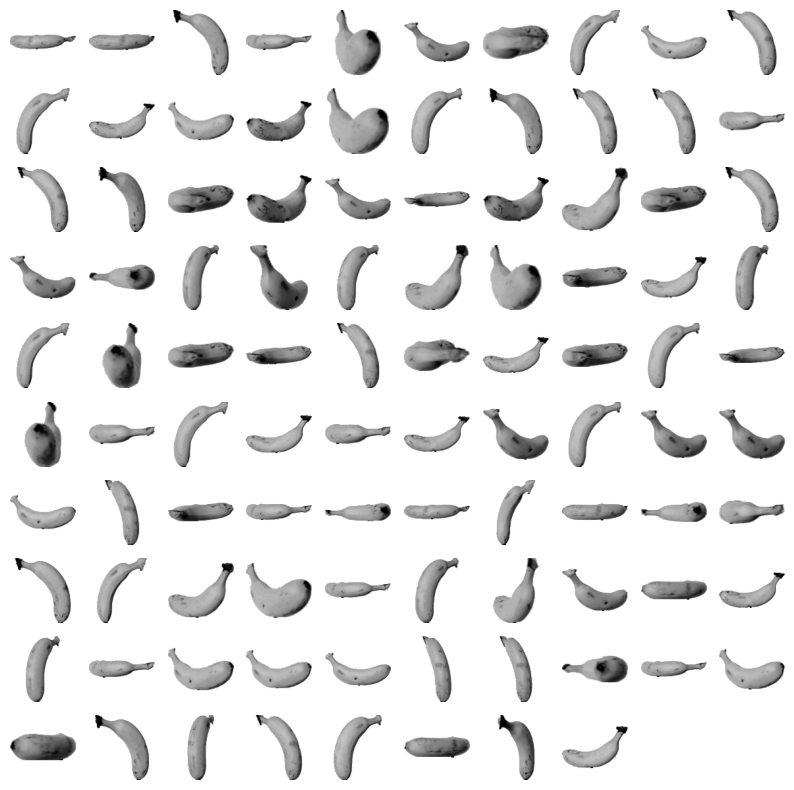

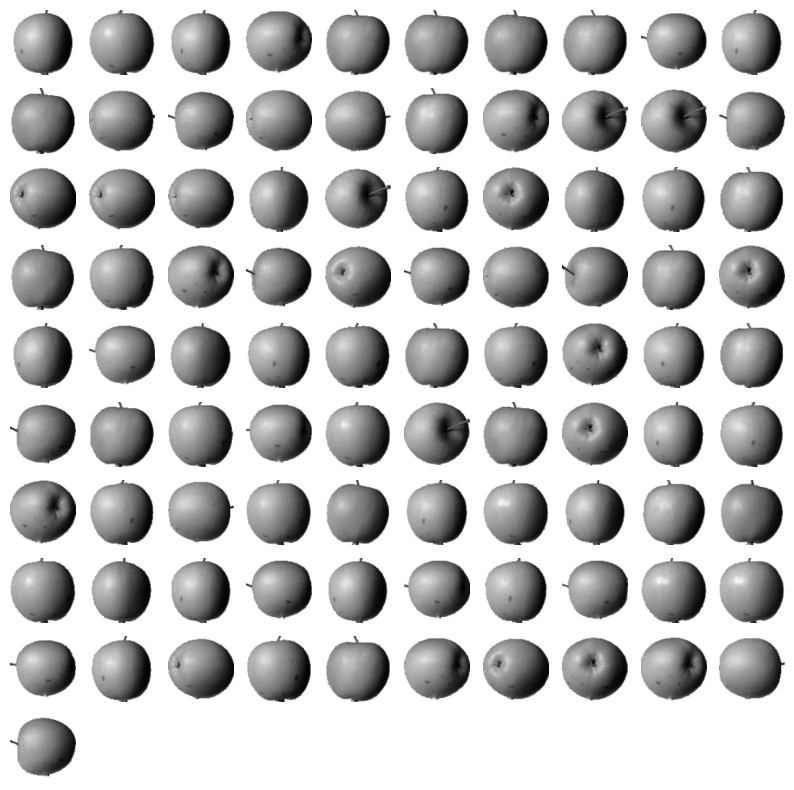

In [27]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

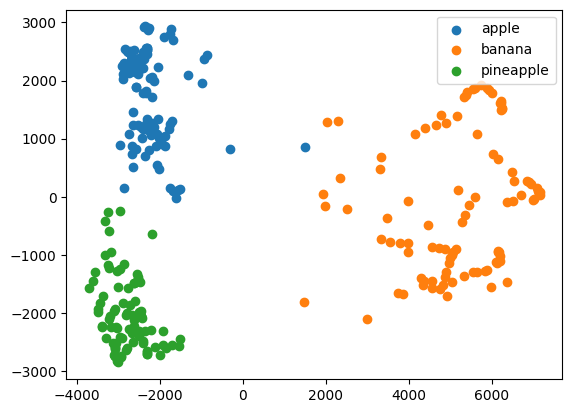

In [29]:
#시각화_산점도 그리기
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

##차원 축소 장점
- 과대적합 억제
- 저장 공간 확보
- 모델 처리 속도 상승
- 모델 성능 상승
- 시각화 가능